In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Mô hình CONSTANT-LEVEL

## Dự đoán giá trị cuối

In [1]:
def end_value(X):
    return X[-1]

## Dự đoán trung bình

In [2]:
def average(X):
    return sum(X) * 1. / len(X)

## Dự đoán Moving-Average

In [4]:
def moving_average(X, n):
    t = len(X)
    return sum(X[t-n:]) *1. / n

## Dự đoán Exponential Smoothing

In [2]:
def exp_smooth(X, alpha):
    F = []
    t = len(X)
    F.append(X[0])
    for i in range(1, t+1):
        last_value = alpha * X[i-1] + (1 - alpha) * F[i-1]
        F.append(last_value)
    return F

In [3]:
X = [6809, 6465, 6569, 8266, 7257, 7064, 7784, 8724, 6992, 6822, 7949, 9650]

In [36]:
time = ['Y1Q1', 'Y1Q2', 'Y1Q3', 'Y1Q4', 'Y2Q1', 'Y2Q2', 'Y2Q3', 'Y2Q4', 'Y3Q1', 'Y3Q2', 'Y3Q3', 'Y3Q4']

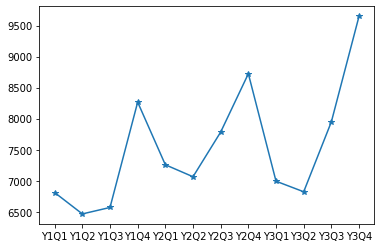

In [15]:
plt.plot(time , X, marker='*')

In [4]:
X_mod = [7322, 7183, 6635, 7005, 7803, 7849, 7863, 7393, 7518, 7580, 8029, 8178]

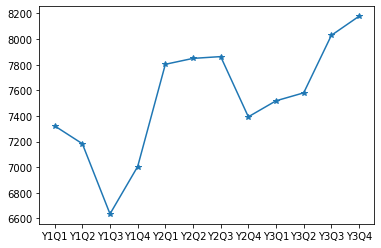

In [17]:
plt.plot(time , X_mod, marker='*')

In [18]:
F = exp_smooth(X_mod, 0.1)

In [19]:
F

[7322,
 7322.0,
 7308.1,
 7240.790000000001,
 7217.211000000001,
 7275.789900000002,
 7333.110910000001,
 7386.099819000002,
 7386.789837100002,
 7399.910853390002,
 7417.9197680510015,
 7479.027791245902,
 7548.925012121313]

In [37]:
time1 = time.copy()

In [38]:
time1.append('Y4Q1')

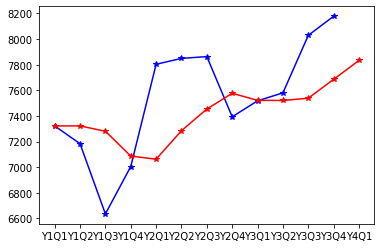

In [33]:
plt.figure
#plt.plot(time, X, marker='*', color='k')
plt.plot(time, X_mod, marker='*', color='b')
plt.plot(time1, exp_smooth(X_mod, 0.3), marker='*', color='r')

In [17]:
def loss_MSE(data, alpha):
    forecast = exp_smooth(data, alpha)
    return 1./len(data) * (sum(abs(np.array(data)-np.array(forecast[:-1])))) 
    

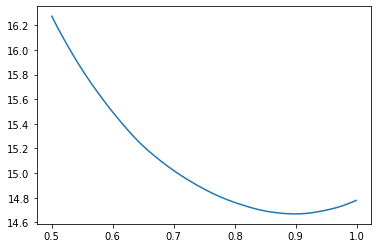

In [114]:
alpha = [1./1000*i for i in range(500,1000)]
loss = [loss_MSE(y, i) for i in alpha]
plt.figure()
plt.plot(alpha, loss)

## MÔ HÌNH LINEAR TREND

In [18]:
def linear_trend(X, alpha, beta, x0, T1):
    F = []
    L = []
    T = []
    t = len(X)
    # Khởi tạo F, L, T
    T.append(T1)
    F1 = x0 + T1
    F.append(F1)
    L2 = alpha * (X[0] - x0) + (1 - alpha) * (F1 - x0)
    L.append(L2)
    T2 = beta * L2 + (1 - beta) * T1
    T.append(T2)
    for i in range(1, t):
        F.append(alpha * X[i-1] + (1-alpha)*F[-1] + T[-1])
        L.append(alpha * (X[i]-X[i-1]) + (1-alpha) * (F[-1]-F[-2]))
        T.append(beta * L[-1] + (1-beta) * T[-1])
    F.append(alpha * X[-1] + (1-alpha)*F[-1] + T[-1])
#    print(T)
    return F

In [33]:
F = linear_trend(X_mod, 0.3, 0.3, 7500, 0)

[0, -16.02, -38.30220000000001, -99.7725419999999, -100.52225262000005, -20.18004731820016, 42.01570065169772, 83.03131117197347, 61.969420530688964, 52.89884923402789, 47.3685528953027, 79.64417569761778, 108.47913584645255]


In [34]:
F

[7500,
 7430.58,
 7318.0038,
 7013.330118,
 6910.308829979999,
 7157.9361336677985,
 7407.270994219156,
 7627.021007125382,
 7618.784125518457,
 7641.447737096948,
 7670.381968863167,
 7857.611553901834,
 8062.207223577737]

In [16]:
X_mod

[7322, 7183, 6635, 7005, 7803, 7849, 7863, 7393, 7518, 7580, 8029, 8178]

In [17]:
F

[7500,
 7388.879999999999,
 7145.416799999999,
 7231.669847999999,
 7612.354223279998,
 7793.952073960798,
 7881.789269669685,
 7743.784207927402,
 7767.005832624971,
 7832.445128641776,
 8069.913799127024,
 8249.293103560038]

[0, -16.02, -38.30220000000001, -99.7725419999999, -100.52225262000005, -20.18004731820016, 42.01570065169772, 83.03131117197347, 61.969420530688964, 52.89884923402789, 47.3685528953027, 79.64417569761778, 108.47913584645255]


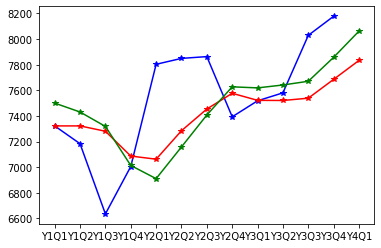

In [50]:
plt.figure
#plt.plot(time, X, marker='*', color='k')
plt.plot(time, X_mod, marker='*', color='b')
plt.plot(time1, exp_smooth(X_mod, 0.3), marker='*', color='r')
plt.plot(time1, linear_trend(X_mod, 0.3, 0.3, 7500, 0), marker='*', color='g')

In [30]:
def loss_MAE(data, alpha, beta):
    forecast = linear_trend(data, alpha, beta, 7500, 0)
    return 1./len(data) * (sum(abs(np.array(data) - np.array(forecast[:-1]))))

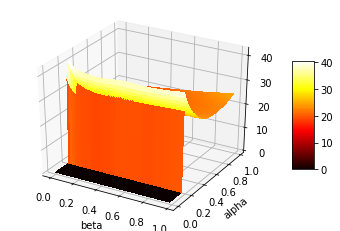

In [105]:
n = 50
alpha = [1./n*i for i in range(n)]
beta = [1./n*i for i in range(n)]
alpha, beta = np.meshgrid(alpha, beta)
loss = np.zeros([n, n])
for i in range(n//5, n):
    for j in range(n):
        loss[i][j] = loss_MAE(y, i*1./n, j*1./n)
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(alpha, beta, loss, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("beta")
plt.ylabel("alpha")
plt.show()

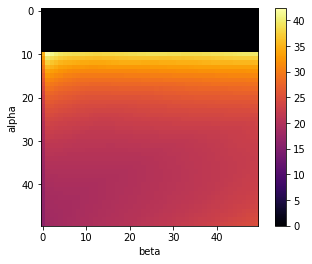

In [106]:
im = plt.imshow(loss, cmap='inferno')
plt.colorbar(im, orientation='vertical')
plt.xlabel('beta')
plt.ylabel('alpha')
plt.show()

In [56]:
type(alpha)

numpy.ndarray

In [81]:
y.shape

(2528,)

In [3]:
import pandas as pd
import numpy as np

# S&P 500 data

In [4]:
data = pd.read_excel('PerformanceGraphExport.xls')

In [5]:
x = data['Unnamed: 2'].dropna()

In [8]:
x = x[1:]

In [7]:
pd.Series(x)

5       S&P 500
6       1186.69
7       1202.26
8        1173.6
9        1165.9
         ...   
2529     2929.8
2530    2930.32
2531    2870.12
2532       2820
2533     2852.5
Name: Unnamed: 2, Length: 2529, dtype: object

In [9]:
y = np.array(x, dtype=float)

In [10]:
z = [i for i in range(len(y))]

In [7]:
F = linear_trend(y, 0.9, 0.05, y[0], 0)
z1 = [i for i in range(len(F))]

In [11]:
F1 = exp_smooth(y, 0.9494)

In [12]:
F1[-1]

2850.9916043398316

In [13]:
F1[-2]

2822.6898090875784

In [14]:
y[-1]

2852.5

In [15]:
F2 = exp_smooth(y, 0.8415)

In [16]:
F2[-1]

2848.8419158960382

In [17]:
F2[-2]

2829.4206050223247

In [19]:
F3 = linear_trend(y, 0.9, 0.05, y[0], 0)

In [20]:
F3[-1]

2851.1017140609174

In [21]:
F3[-2]

2826.0038485243304

In [8]:
F[-1]

2851.1017140609174

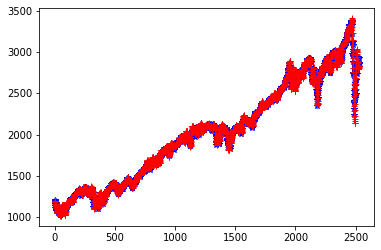

In [48]:
plt.figure()
plt.plot(z, y, color='b', marker='*')
plt.plot(z1, F, color='r', marker='+')

In [82]:
def MSE(x, y):
    return np.sqrt(1./len(x) * np.sum((np.array(x) - np.array(y))**2))

In [83]:
def MAE(x, y):
    return 1./len(x) * np.sum(abs(np.array(x) - np.array(y)))

In [54]:
MSE(y, F[:-1])

1338.1967520489004

In [40]:
F

[1186.69,
 1186.69,
 1192.7622999999999,
 1186.6903029999996,
 1178.2587778299996,
 1156.5219202062997,
 1132.0173470511427,
 1132.0132846079298,
 1132.9683452829672,
 1141.8840366800264,
 1145.2560573567653,
 1140.2266266683737,
 1136.7882287863458,
 1128.100409678155,
 1119.1193994313876,
 1095.5170463098254,
 1083.1209649568477,
 1069.379321163647,
 1060.2927316036782,
 1052.7972730673691,
 1062.6070975158896,
 1067.7912358534238,
 1066.0728214628896,
 1076.0785774578553,
 1086.8252346831243,
 1080.9878236193317,
 1069.832031748937,
 1064.7770945822563,
 1058.5278000531766,
 1066.046391878035,
 1075.0372308864125,
 1082.0531674125,
 1097.6302379136362,
 1109.8763658522041,
 1119.4323824825033,
 1126.3895797002872,
 1128.7795555797102,
 1122.0732786931324,
 1113.694889790146,
 1098.7245774769424,
 1087.1895468847752,
 1077.3222662506282,
 1057.168765844169,
 1037.5210266336721,
 1021.8520167892939,
 1009.5122283871926,
 1004.1876759508743,
 1015.1708984098728,
 1030.8102732742834,
 1

In [84]:
coeffs = [0.05*i for i in range(1, 20)]
min_loss = 10000000000000000
for i in coeffs:
    for j in coeffs:
        loss = MAE(y, linear_trend(y, i, j, y[0], 0)[:-1])
        if loss < min_loss:
            min_loss = loss
            fit_param = (i, j)
print("Minimum loss: ", min_loss)
print("Fit parameters: ", fit_param)

Minimum loss:  13.927759825336459
Fit parameters:  (0.9, 0.05)


In [73]:
y2 = data['Unnamed: 1'].dropna()

In [77]:
y2 = y2[1:]

In [78]:
y2 = np.array(y2, dtype=float)

In [79]:
y2

array([1967.05, 1992.87, 1945.37, ..., 5863.68, 5761.7 , 5829.33])

In [87]:
coeffs = [0.05*i for i in range(1, 20)]
min_loss = 10000000000000000
for i in coeffs:
    for j in coeffs:
        loss = MAE(y2, linear_trend(y2, i, j, y2[0], 0)[:-1])
        if loss < min_loss:
            min_loss = loss
            fit_param = (i, j)
print("Minimum loss: ", min_loss)
print("Fit parameters: ", fit_param)

Minimum loss:  26.2683286680571
Fit parameters:  (0.9, 0.05)


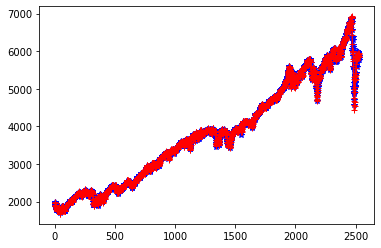

In [86]:
plt.figure()
plt.plot(z, y2, color='b', marker='*')
plt.plot(z1, linear_trend(y2, 0.3, 0.3, y2[0], 0), color='r', marker='+')

# Historical public debt data

In [98]:
public_debt = pd.read_excel('imf-dm-export-20200515.xls')

_locate_stream(Workbook): seen
    0  5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
   20  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
 1220= 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
 1240  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 2 2 
 1260  2 2 2 2 2 2 2 2 


CompDocError: Workbook corruption: seen[2] == 4